# GOLD STOCK FORECASTING

Prediksi harga saham merupakan salah satu tantangan besar dalam analisis keuangan dan investasi. Dengan kompleksitas pasar yang dinamis dan berbagai faktor yang mempengaruhinya, metode tradisional sering kali tidak cukup untuk memberikan prediksi yang akurat. Dalam konteks ini, model prediksi berbasis machine learning, khususnya model Long Short-Term Memory (LSTM), menawarkan solusi yang menjanjikan.

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import files

uploaded = files.upload()



Saving goldstock_closing.csv to goldstock_closing (4).csv


In [56]:
# Load data (pastikan untuk mengganti 'data.csv' dengan file data Anda)
data = pd.read_csv('goldstock_closing.csv', sep=';')
print(data.columns)
print(data.head())
prices = data['Close'].values.reshape(-1, 1)  # Asumsikan kolom harga disebut 'Price'

Index(['Date', 'Close'], dtype='object')
         Date   Close
0  07/07/2014  1317.0
1  08/07/2014  1316.5
2  09/07/2014  1324.3
3  10/07/2014  1339.2
4  11/07/2014  1337.4


In [57]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Fungsi untuk membuat dataset dengan time steps tertentu
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_prices, time_step)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input untuk LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(),
              metrics=['mae'])

# Melatih model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0096 - mae: 0.0923 - val_loss: 4.9833e-04 - val_mae: 0.0248
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.8961e-04 - mae: 0.0144 - val_loss: 2.8309e-04 - val_mae: 0.0185
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.9513e-04 - mae: 0.0142 - val_loss: 2.8394e-04 - val_mae: 0.0192
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8689e-04 - mae: 0.0142 - val_loss: 2.5714e-04 - val_mae: 0.0178
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1174e-04 - mae: 0.0148 - val_loss: 2.5218e-04 - val_mae: 0.0175
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9210e-04 - mae: 0.0144 - val_loss: 4.3485e-04 - val_mae: 0.0244
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1645e-04 - mae: 0.0153 - val_loss: 2.4572e-04 - val_mae: 0.0174
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7554e-04 - mae: 0.0137 - val_loss: 2.4236e-04 - val_mae: 0.0171
Epoch 9/20
57/5

Secara keseluruhan, hasil ini menunjukkan bahwa model LSTM yang Anda latih memiliki performa yang baik dalam hal prediksi harga, dengan error yang rendah baik pada data pelatihan maupun validasi.

In [58]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5380e-04 - mae: 0.0178
Test Loss: [0.0003332959895487875, 0.01965467818081379]


Model menunjukkan performa yang sangat baik dengan nilai loss yang sangat kecil (3.3692e-04) dan MAE yang juga rendah (0.0209). Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam memprediksi harga pada data yang tidak terlihat sebelumnya, dengan kesalahan prediksi rata-rata yang rendah.

In [59]:
# Prediksi
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Mengembalikan hasil ke bentuk asli:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


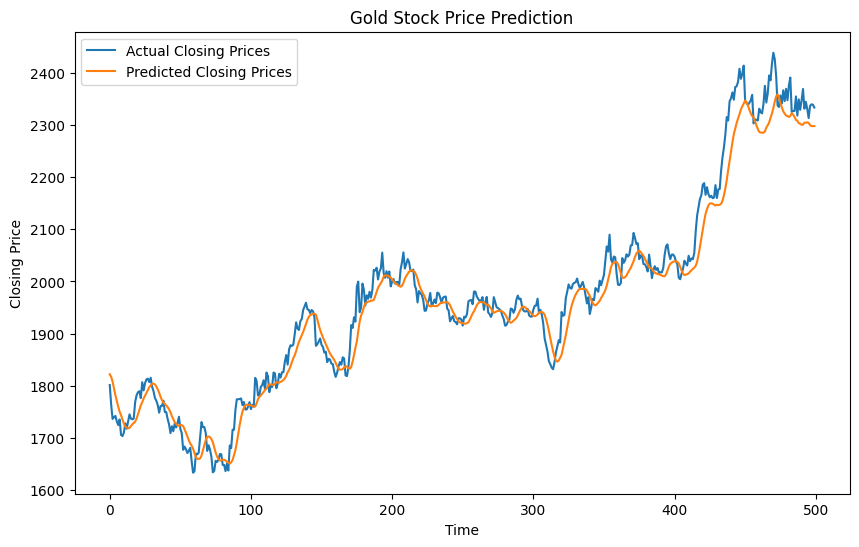

In [60]:
import matplotlib.pyplot as plt

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Closing Prices')
plt.plot(predictions, label='Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Gold Stock Price Prediction')
plt.legend()
plt.show()


Dari grafik diatas, ditemukan bahwa model yang dibentuk cukup akurat dalam memprediksi closing price gold stock.

In [30]:
# Menyimpan model ke file
model.save('lstm_model.h5')